### **Optimization Techniques in ANN: Calls backs and early stopping**

In [1]:
# Step 1: Imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 2: Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize inputs
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images: 28x28 → 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [4]:
# Step 3: Build the ANN model
def create_ann_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(784,)),
        #layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        #layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [5]:
# Step 5: Train the model_without optimization
model_1 = create_ann_model()

history1 = model_1.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8455 - loss: 0.5473 - val_accuracy: 0.9648 - val_loss: 0.1207
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9645 - loss: 0.1184 - val_accuracy: 0.9712 - val_loss: 0.0951
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9755 - loss: 0.0779 - val_accuracy: 0.9763 - val_loss: 0.0804
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9846 - loss: 0.0510 - val_accuracy: 0.9795 - val_loss: 0.0740
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9892 - loss: 0.0367 - val_accuracy: 0.9775 - val_loss: 0.0762
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9926 - loss: 0.0254 - val_accuracy: 0.9787 - val_loss: 0.0794
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9930 - loss: 0.0208 - val_accuracy: 0.9795 - val_loss: 0.0780
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9956 - loss: 0.0151 - val_accuracy: 0.

In [6]:
# Step 6: Evaluate on test set
test_loss, test_acc = model_1.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9795
Test Loss: 0.1062


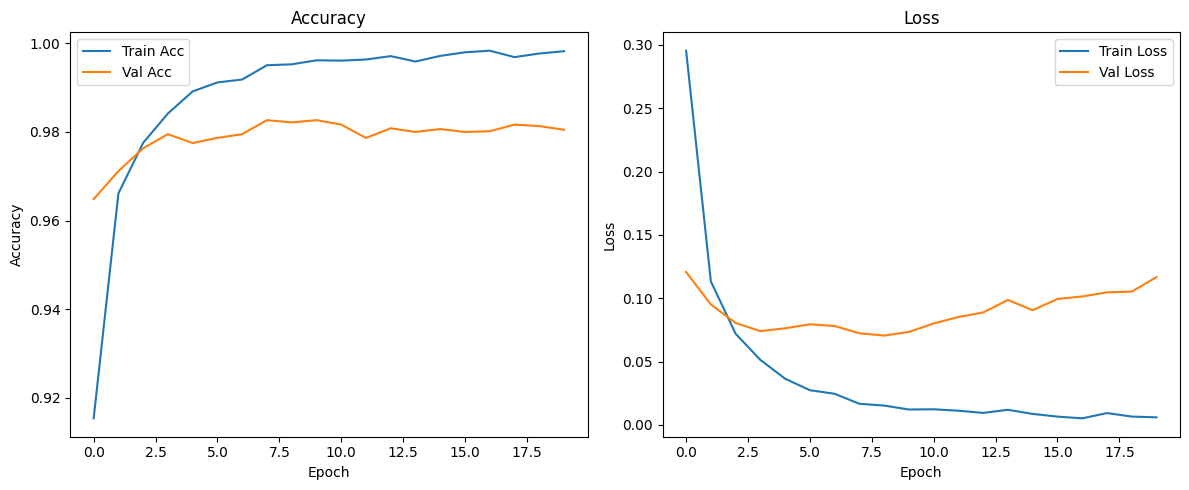

In [7]:
# Step 7: Plot training history
def plot_history(history):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history1)

### Basic Model Optimization with Callbacks (like early stopping & learning rate)

In [8]:
# Step 4: Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# reduce learning rate at 0.5 rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1)


In [9]:
# Step 5: Train the model with callbacks
model_2 = create_ann_model()

history2 = model_2.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

Epoch 1/20
422/422 - 4s - 10ms/step - accuracy: 0.9154 - loss: 0.2903 - val_accuracy: 0.9648 - val_loss: 0.1225 - learning_rate: 1.0000e-03
Epoch 2/20
422/422 - 6s - 14ms/step - accuracy: 0.9669 - loss: 0.1100 - val_accuracy: 0.9738 - val_loss: 0.0868 - learning_rate: 1.0000e-03
Epoch 3/20
422/422 - 3s - 7ms/step - accuracy: 0.9781 - loss: 0.0717 - val_accuracy: 0.9755 - val_loss: 0.0822 - learning_rate: 1.0000e-03
Epoch 4/20
422/422 - 3s - 7ms/step - accuracy: 0.9844 - loss: 0.0510 - val_accuracy: 0.9755 - val_loss: 0.0839 - learning_rate: 1.0000e-03
Epoch 5/20
422/422 - 6s - 13ms/step - accuracy: 0.9881 - loss: 0.0386 - val_accuracy: 0.9780 - val_loss: 0.0757 - learning_rate: 1.0000e-03
Epoch 6/20
422/422 - 5s - 11ms/step - accuracy: 0.9906 - loss: 0.0298 - val_accuracy: 0.9767 - val_loss: 0.0777 - learning_rate: 1.0000e-03
Epoch 7/20
422/422 - 5s - 12ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9782 - val_loss: 0.0788 - learning_rate: 1.0000e-03
Epoch 8/20
422/422 - 5

In [10]:
test_loss, test_acc = model_2.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9848
Test Loss: 0.0660


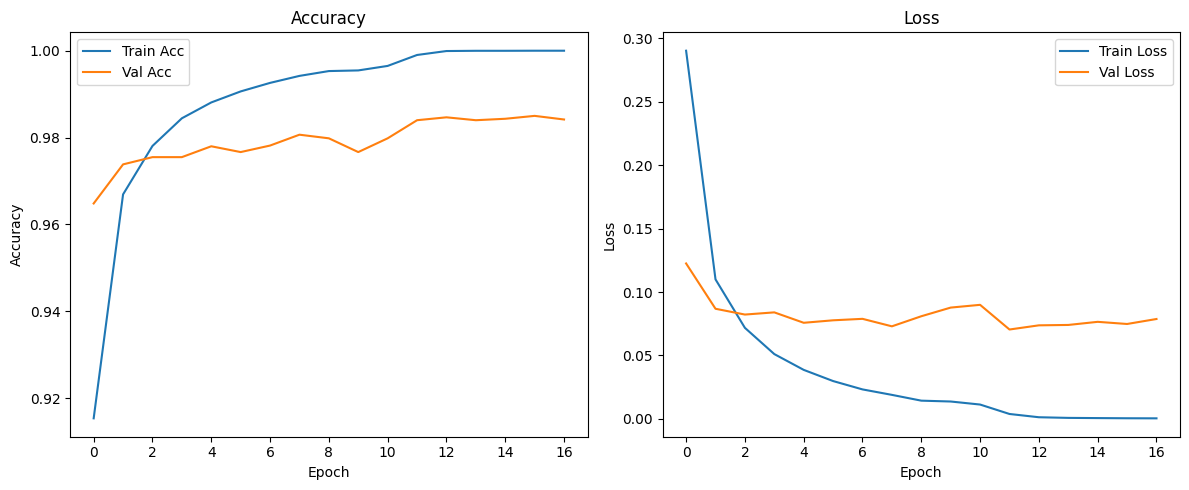

In [11]:
plot_history(history2)

### Basic Model Optimization with Model Checkpoints Callback

In [13]:
#Model Checkpointing: Model training will be saved in every epoch, we can backup and restore the partially trained model.

model_ckpt = ModelCheckpoint(
    filepath="best_model.h5",      # Save the checkpoints to best_model.h5 file during learning so that it can go back.
    monitor='val_accuracy',        # Save based on validation accuracy
    save_best_only=True,           # Only keep the best model
    save_weights_only=False,       # Save the entire model (not just weights)
    mode='max',                    # We want to maximize val_accuracy
    verbose=1                      # Log saving information
)

In [14]:
#with Checkpoints
model_3 = create_ann_model()

history3 = model_3.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    callbacks=[early_stop, reduce_lr,model_ckpt],
    verbose=2
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.96267, saving model to best_model.h5


422/422 - 4s - 10ms/step - accuracy: 0.9194 - loss: 0.2843 - val_accuracy: 0.9627 - val_loss: 0.1293 - learning_rate: 1.0000e-03
Epoch 2/20

Epoch 2: val_accuracy improved from 0.96267 to 0.97300, saving model to best_model.h5


422/422 - 3s - 8ms/step - accuracy: 0.9678 - loss: 0.1059 - val_accuracy: 0.9730 - val_loss: 0.0906 - learning_rate: 1.0000e-03
Epoch 3/20

Epoch 3: val_accuracy improved from 0.97300 to 0.97883, saving model to best_model.h5


422/422 - 3s - 8ms/step - accuracy: 0.9788 - loss: 0.0704 - val_accuracy: 0.9788 - val_loss: 0.0737 - learning_rate: 1.0000e-03
Epoch 4/20

Epoch 4: val_accuracy improved from 0.97883 to 0.98000, saving model to best_model.h5


422/422 - 5s - 11ms/step - accuracy: 0.9846 - loss: 0.0509 - val_accuracy: 0.9800 - val_loss: 0.0689 - learning_rate: 1.0000e-03
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.98000
422/422 - 7s - 16ms/step - accuracy: 0.9883 - loss: 0.0367 - val_accuracy: 0.9760 - val_loss: 0.0841 - learning_rate: 1.0000e-03
Epoch 6/20

Epoch 6: val_accuracy improved from 0.98000 to 0.98083, saving model to best_model.h5


422/422 - 4s - 9ms/step - accuracy: 0.9909 - loss: 0.0294 - val_accuracy: 0.9808 - val_loss: 0.0681 - learning_rate: 1.0000e-03
Epoch 7/20

Epoch 7: val_accuracy did not improve from 0.98083
422/422 - 5s - 12ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9805 - val_loss: 0.0731 - learning_rate: 1.0000e-03
Epoch 8/20

Epoch 8: val_accuracy did not improve from 0.98083
422/422 - 4s - 9ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9788 - val_loss: 0.0770 - learning_rate: 1.0000e-03
Epoch 9/20

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 9: val_accuracy did not improve from 0.98083
422/422 - 4s - 9ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9803 - val_loss: 0.0799 - learning_rate: 1.0000e-03
Epoch 10/20

Epoch 10: val_accuracy improved from 0.98083 to 0.98317, saving model to best_model.h5


422/422 - 3s - 7ms/step - accuracy: 0.9988 - loss: 0.0052 - val_accuracy: 0.9832 - val_loss: 0.0743 - learning_rate: 5.0000e-04
Epoch 11/20

Epoch 11: val_accuracy improved from 0.98317 to 0.98367, saving model to best_model.h5


422/422 - 6s - 14ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.9837 - val_loss: 0.0761 - learning_rate: 5.0000e-04
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 6.


In [16]:
test_loss, test_acc = model_3.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9804
Test Loss: 0.0655


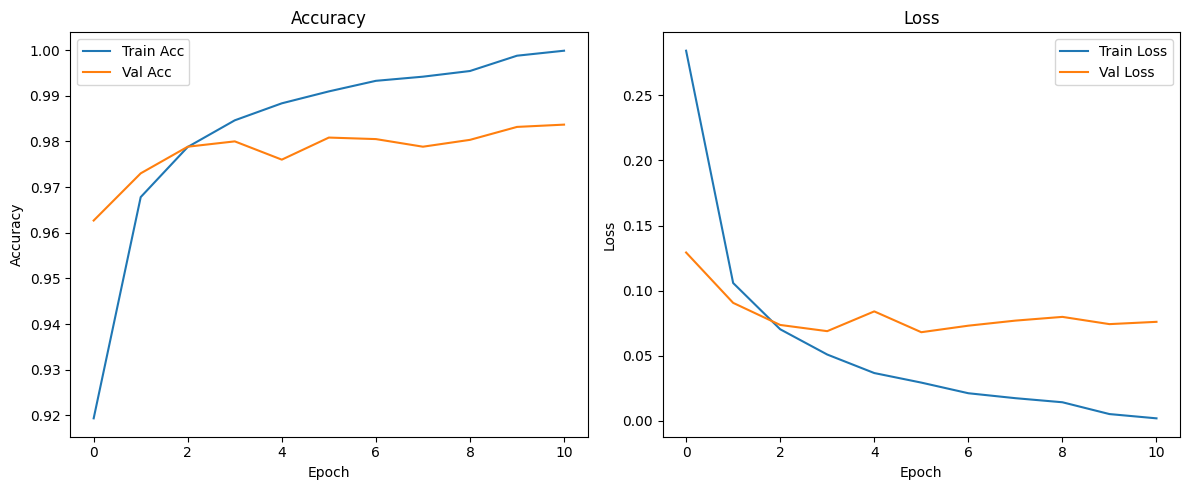

In [17]:
plot_history(history3)

In [18]:
#Load the best saved model later
best_model_restored = tf.keras.models.load_model('best_model.h5')

In [19]:
pred = best_model_restored.predict(x_test)
y_pred = tf.argmax(pred, axis=1)

loss, acc = best_model_restored.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

#Resume Training from the Saved Model
#Can also train the model further with more epochs

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9809 - loss: 0.0779
Test Loss: 0.0657, Test Accuracy: 0.9834
